In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


##Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
dataset_path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Document Categorization/Excel_Clean_Dataset/'
path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Document Categorization/' 
import warnings  
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')  
warnings.filterwarnings(action='ignore',category=FutureWarning,module='gensim') 

## Data Preparation

In [6]:
df = pd.read_csv(dataset_path+'News_12Class.csv')
df.Category.value_counts()

Politics         20051
Education        12213
Sports           11904
Entertainment    10122
Crime             8655
Opinion           8099
Accident          6329
International     5156
Environment       4314
Economics         3450
Science           2907
Art               2666
Name: Category, dtype: int64

##Data Cleaning

In [7]:
stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
def process_news(row):
  news = row.replace('\n', '') #removing new line 
  news = re.sub('[^\u0980-\u09FF]',' ',str(news)) #removing unnecessary punctuation
  result = news.split()
  news = [word.strip() for word in result if word not in stp ]
   #reviews =" ".join(reviews)
  return news   

In [8]:
# Apply the function into the dataframe
df['Text'] = df['Text'].apply(process_news) 
# convert the Text column into a list 
review_data_list = df['Text'].values.tolist()

##Word2vec Model

In [9]:
#Train a Word2Vec model using Gensim
import gensim
Embedding_Dim = 128
#train word2vec model
model = word2vec.Word2Vec(sentences = review_data_list, size = Embedding_Dim,window=10, min_count=2, workers=4)
#Vocabulary size
words = list(model.wv.vocab)
print('Here is the Vocabulary Size.. %d' % len(words))

Here is the Vocabulary Size.. 240424


In [12]:
#Finding similar words
model.wv.most_similar('আবুল')

[('শাখাওয়াত', 0.5479358434677124),
 ('সবদলকে', 0.5459412336349487),
 ('আজাদ', 0.5443950295448303),
 ('আবুয়াল', 0.5431142449378967),
 ('তোফাজ্জল', 0.5377413034439087),
 ('জাকির', 0.5348339080810547),
 ('সাদিদ', 0.5309569835662842),
 ('আফজাল', 0.5227194428443909),
 ('মোসাব্বেক', 0.5192455053329468),
 ('এপিজে', 0.5179145336151123)]

In [14]:
# Save the word2vec model into a pickle file
import pickle
file = open(path+'word2vec_model.pkl','wb')
pickle.dump(model,file)

In [65]:
model = pickle.load(open(path+'word2vec_model.pkl','rb'))
model.wv.most_similar('রাজা')

[('রাজার', 0.7347685098648071),
 ('সম্রাট', 0.7265712022781372),
 ('দেবী', 0.7063919305801392),
 ('সিংহাসনে', 0.704075813293457),
 ('হাসন', 0.7008222341537476),
 ('রানি', 0.6938066482543945),
 ('বংশের', 0.6917754411697388),
 ('প্রজা', 0.6907597780227661),
 ('রামমোহন', 0.6866333484649658),
 ('দুর্গার', 0.6836349964141846)]

## TSNE Plot

In [30]:
# for showing Bangla Font
from __future__ import unicode_literals
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Book Review Classification/kalpurush.ttf'
prop = fm.FontProperties(fname=font_path)

In [72]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab:
        #tokens.append(model[word])
        #labels.append(word)
        
        
    for word in list(model.wv.vocab.keys())[:1000]:
        tokens.append(model[word])
        labels.append(word)    
    
    tsne_model = TSNE(perplexity=500, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     fontproperties=prop,
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(path+'wor2vec.png',dpi = 500,orientation = 'landscape',bbox_inches ='tight')
    plt.show()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


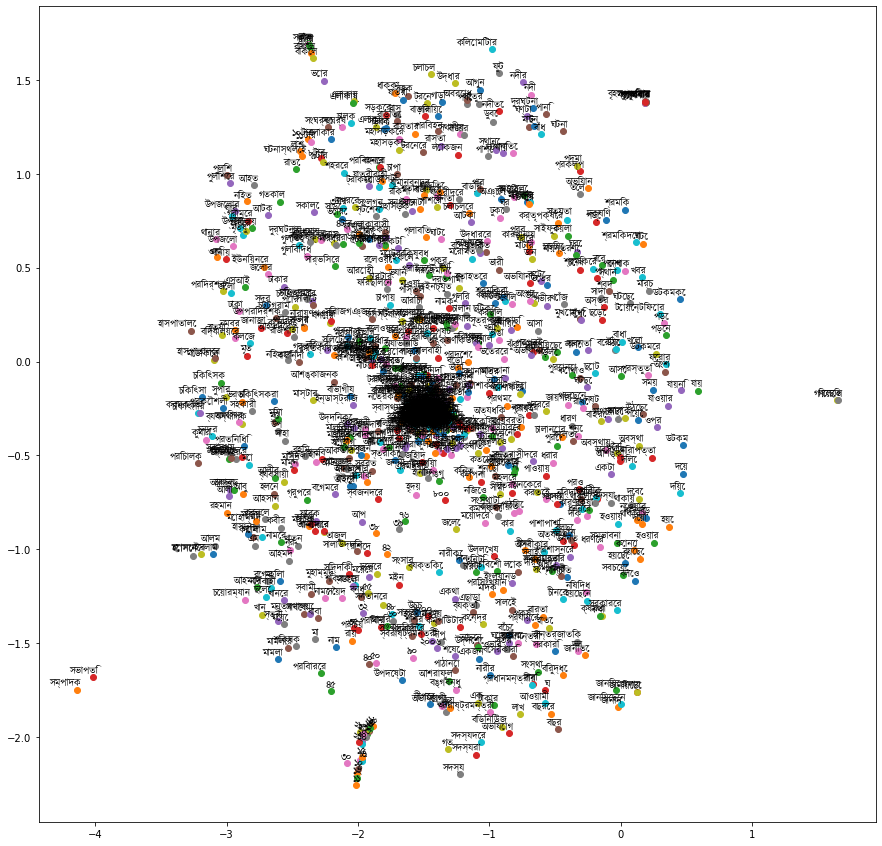

In [73]:
tsne_plot(model)

In [ ]:
#Save word embedding model
model_file = path+'news_word2vec_embedding.txt'
model.wv.save_word2vec_format(model, binary=False)